In [97]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter
from statsmodels.formula.api import ols

In [98]:
os.getcwd()

'/Users/rql/master/课程/数据挖掘/互评作业/assignment_2'

In [99]:
df1 = pd.read_csv('/Users/rql/master/课程/数据挖掘/wine/winemag-data_first150k.csv')
df2 = pd.read_csv('/Users/rql/master/课程/数据挖掘/wine/winemag-data-130k-v2.csv')
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB
None


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [100]:
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


处理缺失数据，使用最高频数据来进行缺失值的填充

In [101]:
for attribute in df1.columns.values:
    df1[attribute] = df1[attribute].fillna(df1[attribute].mode()[0])
print(df1.info())
for attribute in df2.columns.values:
    df2[attribute] = df2[attribute].fillna(df2[attribute].mode()[0])
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150930 non-null  object 
 2   description  150930 non-null  object 
 3   designation  150930 non-null  object 
 4   points       150930 non-null  int64  
 5   price        150930 non-null  float64
 6   province     150930 non-null  object 
 7   region_1     150930 non-null  object 
 8   region_2     150930 non-null  object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  

In [102]:
df1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Central Coast,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Central Coast,Provence red blend,Domaine de la Bégude


In [103]:
df2.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,20.0,Sicily & Sardinia,Etna,Central Coast,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Napa Valley,Central Coast,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",Reserve,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Central Coast,Alexander Peartree,@vossroger,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


使用apriors算法计算频繁项,keys表示频繁项集，key表示频繁项，C表示D中每一项的支持计数

In [104]:
def aproiri(D,minSup):
    C1={}

    for T in D:
        for i in T:
            if i in C1:
                C1[i]+=1
            else:
                C1[i]=1
    
    _keys1=C1.keys()

    
    keys1 = []
    for i in _keys1:
        keys1.append([i])
    n = len(D)

    cutKeys1=[]
    for k in keys1[:]:
        if C1[k[0]]*1.0/n >= minSup:
            cutKeys1.append(k)
    cutKeys1.sort()
    keys = cutKeys1
    all_keys = []
    all_sups = []
    while keys != []:
        C=getC(D,keys)
        cutKeys,sups = getCutKeys(keys,C,minSup,len(D))
        
        for key in cutKeys:
            all_keys.append(key)
        for sup in sups:
            all_sups.append(sup)
        keys = aproiri_gen(cutKeys)
    return all_keys,all_sups

#获得每个Key的计数
def getC(D,keys):
    C= []
    for key in keys:
        c=0
        for T in D:
            flag =True
            for k in key:
                if k not in T:
                    flag =False
            if flag:
                c+=1
        C.append(c)
    return(C)

#剪枝操作
def getCutKeys(keys,C,minSup,length):
    kk =[]
    sups=[]
    for i,key in enumerate(keys):
        if float(C[i])/length>=minSup:
            kk.append(key)
            sups.append(float(C[i])/length)
    return kk,sups

#判断key是否在数据库某一元组T中
def keyInT(key,T):
    for k in key:
        if k not in T:
            return False
    return True

#连接频繁项
def aproiri_gen(keys1):
    keys2=[]
    for k1 in keys1:
        for k2 in keys1:
            if k1!=k2:
                key = []
                for k in k1:
                    if k not in key:
                        key.append(k)
                for k in k2:
                    if k not in key:
                        key.append(k)
                key.sort()
                if key not in keys2:
                    keys2.append(key)
    return keys2

计算频繁项集和支持度

In [105]:
df1_copy= df1[['country','province','region_1','variety','winery']]
df1_array = df1_copy.values
fre,sup = aproiri(df1_array,0.05)
print(fre)
print(sup)

[['Cabernet Sauvignon'], ['California'], ['Chardonnay'], ['France'], ['Italy'], ['Napa Valley'], ['Pinot Noir'], ['Red Blend'], ['Spain'], ['US'], ['Washington'], ['Cabernet Sauvignon', 'US'], ['California', 'Pinot Noir'], ['California', 'US'], ['Chardonnay', 'US'], ['Pinot Noir', 'US'], ['US', 'Washington'], ['California', 'Pinot Noir', 'US']]
[0.08480752666799178, 0.29492479957596235, 0.09595176571920758, 0.13978665606572582, 0.15555555555555556, 0.20717551182667462, 0.09468627840720864, 0.06666666666666667, 0.05478036175710594, 0.4134499436825018, 0.06459948320413436, 0.060809646856158486, 0.05059299012787385, 0.29492479957596235, 0.05384615384615385, 0.06852845690054993, 0.06459948320413436, 0.05059299012787385]


找出关联规则，计算置信度,由于我们的算法只能判断频繁项集，并不能找出关联规则，因此从x->y与y->x我们在这都计算一遍。

[0.71703125, 0.14707861927502325]


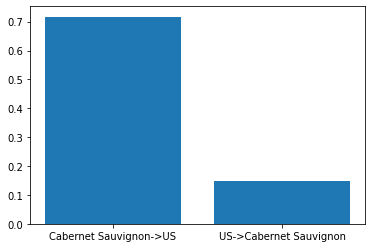

[0.17154539123402152, 0.534322300748723]


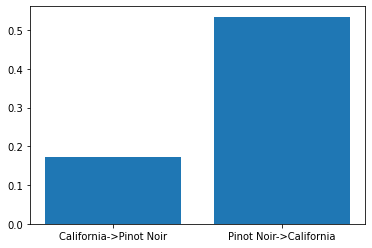

[1.0, 0.7133264959456427]


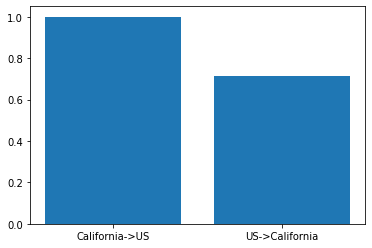

[0.5611793951111725, 0.1302362103778725]


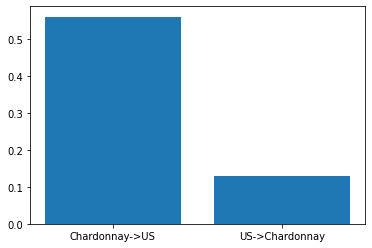

[0.7237422153803094, 0.16574789269574694]


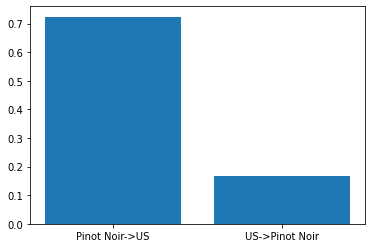

[0.15624499214768756, 1.0]


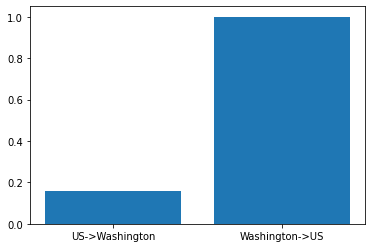

In [106]:
#使用p（B\A）=P(A∩B)/P(A)来计算置信度
for i in range(len(fre)):
    config =sup[i]
    c =[]
    names = []
    if len(fre[i])==1:
        continue
    if len(fre[i])==2:
        for j in range(len(fre)):
            if fre[j][0] == fre[i][0] and len(fre[j])==1:
                temp = config / sup[j]
                c.append(temp)
                ss = fre[i][0] +'->'+fre[i][1]
                names.append(ss)
        for j in range(len(fre)):
            if fre[j][0] == fre[i][1] and len(fre[j])==1:
                temp = config / sup[j]
                c.append(temp)
                ss = fre[i][1]+ '->'+fre[i][0]
                names.append(ss)
    if len(fre[i])==3:
        continue
    print(c)
    plt.bar(names,c)
    plt.show()


计算提升度，考虑到提升度的公式分解下来和箭头的方向无关，因此可以用x->y的支持度同时除以x，y的支持度得到，便于计算

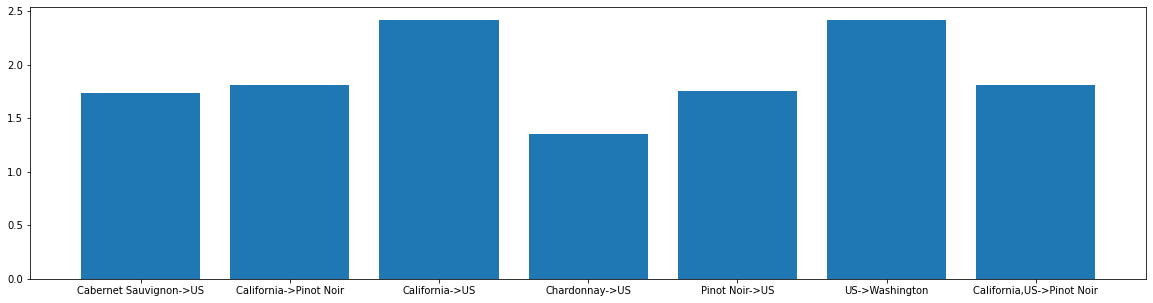

In [107]:
#使用Lift(A->B)=p（B\A）/P(B)=P(A∩B)/P(A)P(B)来计算置信度
c =[]
names = []
for i in range(len(fre)):
    config =sup[i]
    if len(fre[i])==1:
        continue
    if len(fre[i])==2:
        for j in range(len(fre)):
            if fre[j][0] == fre[i][0] and len(fre[j])==1:
                temp = config / sup[j]
                ss = fre[i][0] +'->'+fre[i][1]
                names.append(ss)
        for j in range(len(fre)):
            if fre[j][0] == fre[i][1] and len(fre[j])==1:
                temp = temp / sup[j]
                c.append(temp)
    if len(fre[i])==3:
        temp=config / sup[13]/sup[6]
        c.append(temp)
        ss = fre[i][0]+','+ fre[i][2]+'->'+ fre[i][1]
        names.append(ss)
plt.figure(figsize=(20,5))
plt.bar(names,c)
plt.show()

计算第二个数据集的三个值，由于第二个数据集添加了tastername，因此要将这个属性考虑进去

In [108]:
df2_copy= df2[['country','province','region_1','variety','winery','taster_name']]
df2_array = df2_copy.values

fre2,sup2 = aproiri(df2_array,0.1)
print(fre2)
print(sup2)

[['California'], ['France'], ['Italy'], ['Michael Schachner'], ['Napa Valley'], ['Pinot Noir'], ['Roger Voss'], ['US'], ['California', 'Roger Voss'], ['California', 'US'], ['France', 'Roger Voss'], ['Roger Voss', 'US'], ['California', 'Roger Voss', 'US']]
[0.27937001331066164, 0.16998407337021335, 0.15034122996668486, 0.11644135999569134, 0.19794415677343408, 0.10212278123581414, 0.39822729685853, 0.4198398104192474, 0.12369682467627394, 0.27937001331066164, 0.14516315178001246, 0.12909033553638888, 0.12369682467627394]


[0.4427705866152575, 0.3106186483248966]


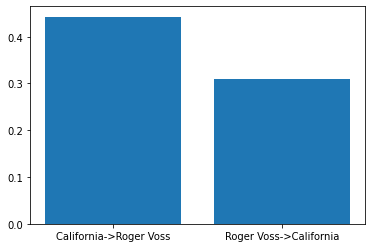

[1.0, 0.665420492238899]


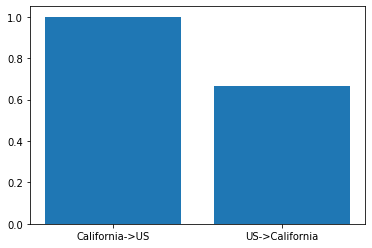

[0.853980898927262, 0.3645233587078326]


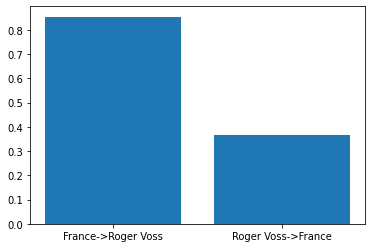

[0.32416244831716834, 0.30747521395715355]


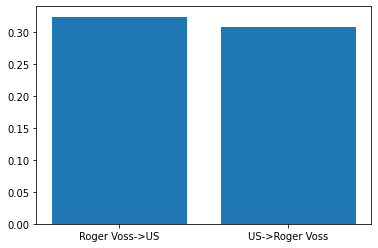

[0.4427705866152575]


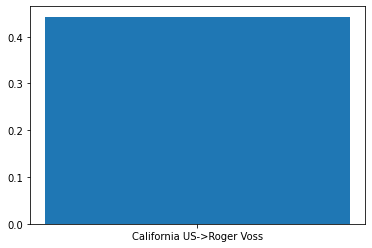

In [109]:

for i in range(len(fre2)):
    c =[]
    names = []
    config =sup2[i]
    if len(fre2[i])==1:
        continue
    if len(fre2[i])==2:
        for j in range(len(fre2)):
            if fre2[j][0] == fre2[i][0] and len(fre2[j])==1:
                temp = config / sup2[j]
                c.append(temp)
                ss = fre2[i][0] +'->'+fre2[i][1]
                names.append(ss)
        for j in range(len(fre2)):
            if fre2[j][0] == fre2[i][1] and len(fre2[j])==1:
                temp = config / sup2[j]
                c.append(temp)
                ss = fre2[i][1] +'->'+fre2[i][0]
                names.append(ss)
    if len(fre2[i])==3:
        temp = config / sup2[9]
        c.append(temp)
        ss = fre2[i][0]+' '+ fre2[i][2]+'->'+ fre2[i][1]
        names.append(ss)
    print(c)
    #plt.figure(figsize=(20,5))
    plt.bar(names,c)
    plt.show()


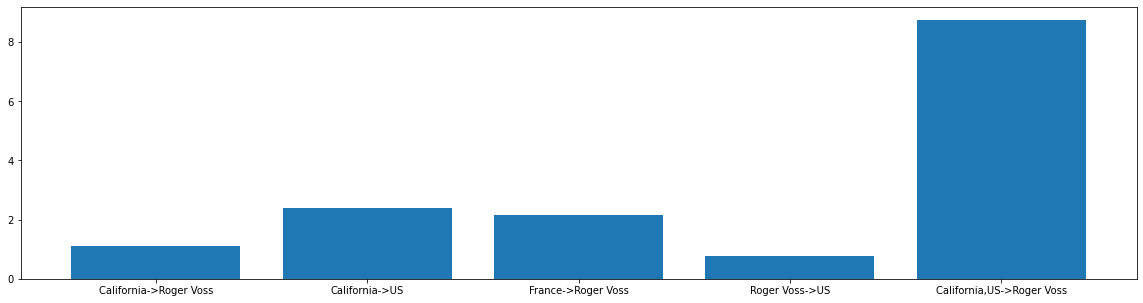

In [110]:
c =[]
names = []
for i in range(len(fre2)):
    config =sup2[i]
    if len(fre2[i])==1:
        continue
    if len(fre2[i])==2:
        for j in range(len(fre2)):
            if fre2[j][0] == fre2[i][0] and len(fre2[j])==1:
                temp = config / sup2[j]
                ss = fre2[i][0] +'->'+fre2[i][1]
                names.append(ss)
        for j in range(len(fre2)):
            if fre2[j][0] == fre2[i][1] and len(fre2[j])==1:
                temp = temp / sup2[j]
                c.append(temp)
    if len(fre2[i])==3:
        temp=config / sup2[9]/sup[12]
        c.append(temp)
        ss = fre2[i][0]+','+ fre2[i][2]+'->'+ fre2[i][1]
        names.append(ss)
plt.figure(figsize=(20,5))
plt.bar(names,c)
plt.show()